In [1]:
import tensorflow as tf
tf.__version__


'2.15.0'

In [2]:
!pip install gdown

In [3]:
!conda --version

/bin/bash: line 1: conda: command not found


In [4]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install tensorflow
!pip install keras

In [ ]:
!gdown 1rA8OnKTJTb4Yzx738g_VLd7Jv0S_g5oc

Downloading...
From: https://drive.google.com/uc?id=1rA8OnKTJTb4Yzx738g_VLd7Jv0S_g5oc
To: /content/apple.zip
100% 5.68M/5.68M [00:00<00:00, 15.3MB/s]


In [ ]:
!unzip apple.zip

Archive:  apple.zip
   creating: apple/
   creating: apple/Test/
   creating: apple/Test/Apple Apple scab Advanced/
  inflating: apple/Test/Apple Apple scab Advanced/Apple_Apple_scab29.jpg  
  inflating: apple/Test/Apple Apple scab Advanced/Apple_Apple_scab32.jpg  
  inflating: apple/Test/Apple Apple scab Advanced/Apple_Apple_scab33.jpg  
  inflating: apple/Test/Apple Apple scab Advanced/Apple_Apple_scab34.jpg  
  inflating: apple/Test/Apple Apple scab Advanced/Apple_Apple_scab39.jpg  
   creating: apple/Test/Apple Apple scab Basic/
  inflating: apple/Test/Apple Apple scab Basic/Apple_Apple_scab22.jpg  
  inflating: apple/Test/Apple Apple scab Basic/Apple_Apple_scab23.jpg  
  inflating: apple/Test/Apple Apple scab Basic/Apple_Apple_scab65.jpg  
  inflating: apple/Test/Apple Apple scab Basic/Apple_Apple_scab66.jpg  
  inflating: apple/Test/Apple Apple scab Basic/Apple_Apple_scab67.jpg  
   creating: apple/Test/Apple Apple scab Medium/
  inflating: apple/Test/Apple Apple scab Medium/Appl

In [6]:
!gdown 1ny5fgmU0vVJJAfVNKN4WgS0qrQ0P48lm

Downloading...
From (original): https://drive.google.com/uc?id=1ny5fgmU0vVJJAfVNKN4WgS0qrQ0P48lm
From (redirected): https://drive.google.com/uc?id=1ny5fgmU0vVJJAfVNKN4WgS0qrQ0P48lm&confirm=t&uuid=ced94cc8-263c-429f-bf8f-7c38d8613fed
To: /content/apple.h5
100% 213M/213M [00:02<00:00, 81.0MB/s]


In [7]:
!gdown 1-3bO99Gtq5iOulugtMKRXQpANEUy52sJ

Downloading...
From (original): https://drive.google.com/uc?id=1-3bO99Gtq5iOulugtMKRXQpANEUy52sJ
From (redirected): https://drive.google.com/uc?id=1-3bO99Gtq5iOulugtMKRXQpANEUy52sJ&confirm=t&uuid=5aba70d8-6a65-4956-8a40-4de5231444fa
To: /content/apple_all.zip
100% 307M/307M [00:02<00:00, 134MB/s]


In [8]:
!unzip apple_all.zip

Streaming output truncated to the last 5000 lines.
  inflating: Apple Black rot/Apple_Black_rot3834.jpg  
  inflating: Apple Black rot/Apple_Black_rot5000.jpg  
  inflating: Apple Black rot/Apple_Black_rot3777.jpg  
  inflating: Apple Black rot/Apple_Black_rot2447.jpg  
  inflating: Apple Black rot/Apple_Black_rot3670.jpg  
  inflating: Apple Black rot/Apple_Black_rot1423.jpg  
  inflating: Apple Black rot/Apple_Black_rot5902.jpg  
  inflating: Apple Black rot/Apple_Black_rot3081.jpg  
  inflating: Apple Black rot/Apple_Black_rot5221.jpg  
  inflating: Apple Black rot/Apple_Black_rot2565.jpg  
  inflating: Apple Black rot/apple_black_rot295.jpg  
  inflating: Apple Black rot/apple_black_rot2974.jpg  
  inflating: Apple Black rot/apple_black_rot324.jpg  
  inflating: Apple Black rot/Apple_Black_rot588.jpg  
  inflating: Apple Black rot/Apple_Black_rot4212.jpg  
  inflating: Apple Black rot/Apple_Black_rot5010.jpg  
  inflating: Apple Black rot/Apple_Black_rot5758.jpg  
  inflating: Appl

In [10]:
import keras
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data paths and other parameters
train_dir = '/content/Apple_new/Train'
val_dir = '/content/Apple_new/Test'
batch_size = 32
img_size = (224, 224)
num_epochs = 40

# Create a data generator with normalization and data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

# Load the VGG16 model without the top layer
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the VGG16 model
for layer in vgg_model.layers:
    layer.trainable = False

# Add a custom top layer for classification
x = Flatten()(vgg_model.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create a new model with the VGG16 base and the custom top layer
model = Model(inputs=vgg_model.input, outputs=predictions)

# Compile the model with a categorical crossentropy loss and an Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data and validate on the validation data
history = model.fit(train_generator, epochs=num_epochs, validation_data=val_generator)

# Evaluate the model on the validation data
model.evaluate(val_generator)

Found 60 images belonging to 4 classes.
Found 15 images belonging to 4 classes.
58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/40
2/2 [==============================] - 25s 13s/step - loss: 7.0904 - accuracy: 0.3167 - val_loss: 11.7697 - val_accuracy: 0.3333
Epoch 2/40
2/2 [==============================] - 1s 498ms/step - loss: 6.6638 - accuracy: 0.4667 - val_loss: 5.6626 - val_accuracy: 0.3333
Epoch 3/40
2/2 [==============================] - 1s 479ms/step - loss: 2.5583 - accuracy: 0.5500 - val_loss: 5.4089 - val_accuracy: 0.4667
Epoch 4/40
2/2 [==============================] - 1s 549ms/step - loss: 1.6150 - accuracy: 0.5667 - val_loss: 3.0284 - val_accuracy: 0.5333
Epoch 5/40
2/2 [==============================] - 1s 579ms/step - loss: 0.7322 - accuracy: 0.7167 - val_loss: 0.7678 - val_accuracy: 0.6667
Epoch 6/40
2/2 [==============================] - 1s 572ms/step - loss: 0.3305 - accuracy: 0.8833 - val_loss: 2.0567 - val_accuracy: 0.4667
Epoch 7/40
2/2 

[1.2623196840286255, 0.7333333492279053]

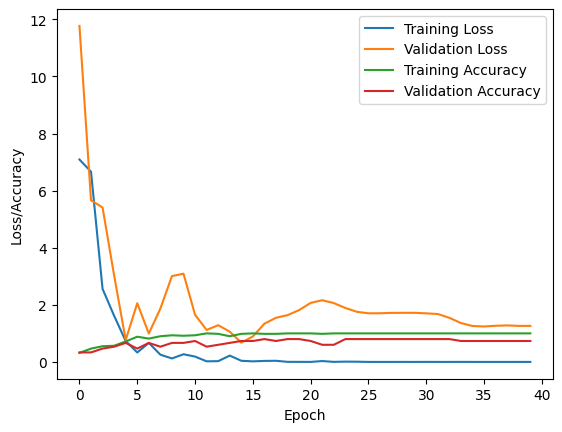

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss and accuracy of the model during training
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [ ]:
#save model
from tensorflow.keras.models import load_model

model.save('apple.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# Load the model
model = load_model('apple.h5')
#Loading the model
from tensorflow.keras.models import load_model


model = load_model('apple.h5')

#Testing the model
class_names = train_generator.class_indices

# Testing the model
test_image = image.load_img('/content/Image Data base/Apple Apple scab/Apple_Apple_scab100.jpg', target_size=(224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)

# Get the predicted class index
predicted_class_index = np.argmax(result[0])

# Map the index to class name using the dictionary
predicted_class_name = list(class_names.keys())[predicted_class_index]

# Print the class name instead of probabilities
print(f"Predicted class: {predicted_class_name}")

1/1 [==============================] - 1s 1s/step
Predicted class: Apple Apple scab Basic


In [11]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
import os
import shutil

# Load the model
model = load_model('apple.h5')

# Assuming you have the class_names dictionary defined elsewhere, provide it here
class_names = train_generator.class_indices  # Replace with your actual class_names dictionary

input_dir = "/content/Image Data base/Apple Apple scab"  # Replace with your input directory path
output_dir = "/content/sorted_images"  # Replace with your desired output directory

os.makedirs(output_dir, exist_ok=True)  # Create the output directory if it doesn't exist

processed_images = 0

for root, dirs, files in os.walk(input_dir):
    for file in files:
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            input_path = os.path.join(root, file)

            # Predict the class of the image
            try:
                test_image = image.load_img(input_path, target_size=(224, 224))
                test_image = image.img_to_array(test_image)
                test_image = np.expand_dims(test_image, axis=0)
                result = model.predict(test_image)
                predicted_class_index = np.argmax(result[0])
                predicted_class_name = list(class_names.keys())[predicted_class_index]
            except Exception as e:
                print(f"Error processing {input_path}: {e}")
                continue  # Skip to the next image on error

            # Create the output directory for the class if it doesn't exist
            class_dir = os.path.join(output_dir, predicted_class_name)
            os.makedirs(class_dir, exist_ok=True)

            # Move the image to the corresponding class directory
            output_path = os.path.join(class_dir, file)
            shutil.move(input_path, output_path)

            processed_images += 1

            # Check if all images have been processed
            if processed_images == len(files):
                print("Image classification and sorting completed!")
                break  # Exit the outer loop to stop execution

print(f"Total images processed: {processed_images}")


NameError: name 'train_generator' is not defined

In [24]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# Load the model
model = load_model('apple.h5')

# Define class names manually based on your dataset
class_names = {
    0: 'Apple Apple scab Advanced',
    1: 'Apple Apple scab Basic',
    2: 'Apple Apple scab Medium',
    3: 'Apple Apple scab Advanced',
    # Add more class indices and names as needed
}

input_dir = "/content/Apple Apple scab/"  # Replace with your input directory path
output_dir = "/content/sorted_images"  # Replace with your desired output directory

os.makedirs(output_dir, exist_ok=True)  # Create the output directory if it doesn't exist

processed_images = 0

for root, dirs, files in os.walk(input_dir):
    for file in files:
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            input_path = os.path.join(root, file)

            # Predict the class of the image
            try:
                test_image = image.load_img(input_path, target_size=(224, 224))
                test_image = image.img_to_array(test_image)
                test_image = np.expand_dims(test_image, axis=0)
                result = model.predict(test_image)
                predicted_class_index = np.argmax(result[0])
                predicted_class_name = class_names[predicted_class_index]
            except Exception as e:
                print(f"Error processing {input_path}: {e}")
                continue  # Skip to the next image on error

            # Create the output directory for the class if it doesn't exist
            class_dir = os.path.join(output_dir, predicted_class_name)
            os.makedirs(class_dir, exist_ok=True)

            # Move the image to the corresponding class directory (only once)
            output_path = os.path.join(class_dir, file)
            shutil.move(input_path, output_path)

            processed_images += 1

    # Exit the outer loop after processing all files in the current directory
    break  # No need to iterate through subdirectories further

print(f"Total images processed: {processed_images}")


1/1 [==============================] - 0s 18ms/step
Total images processed: 70


In [25]:
from os import walk

def count_files(directory):
  """Counts the number of files in a directory and its subdirectories.

  Args:
      directory: The path to the directory to count files in.

  Returns:
      An integer representing the total number of files.
  """
  file_count = 0
  for root, _, files in walk(directory):
    for file in files:
      file_count += 1
  return file_count

# Replace with the actual directory path
directory_path = "/content/sorted_images"

# Count the files
total_files = count_files(directory_path)

print(f"Total number of files: {total_files}")


Total number of files: 340


In [ ]:
!gdown 1-EDm2yH1jM6xgfa58pGYG7lBW1Ycx0De

Downloading...
From (original): https://drive.google.com/uc?id=1-EDm2yH1jM6xgfa58pGYG7lBW1Ycx0De
From (redirected): https://drive.google.com/uc?id=1-EDm2yH1jM6xgfa58pGYG7lBW1Ycx0De&confirm=t&uuid=c4f1e148-e5a8-4ab0-96a6-cb7fc8281f4b
To: /content/plant-disease-expert_output.zip
100% 5.47G/5.47G [01:02<00:00, 87.8MB/s]


In [ ]:
!unzip plant-disease-expert_output.zip

Streaming output truncated to the last 5000 lines.
  inflating: Image Data base/Apple Cedar apple rust/apple_cedar_apple_rust738.jpg  
  inflating: Image Data base/Apple Cedar apple rust/apple_cedar_apple_rust133.jpg  
  inflating: Image Data base/Apple Cedar apple rust/apple_cedar_apple_rust1717.jpg  
  inflating: Image Data base/Apple Cedar apple rust/apple_cedar_apple_rust2001.jpg  
  inflating: Image Data base/Apple Cedar apple rust/apple_cedar_apple_rust1207.jpg  
  inflating: Image Data base/Apple Cedar apple rust/apple_cedar_apple_rust1924.jpg  
  inflating: Image Data base/Apple Cedar apple rust/apple_cedar_apple_rust782.jpg  
  inflating: Image Data base/Apple Cedar apple rust/apple_cedar_apple_rust1838.jpg  
  inflating: Image Data base/Apple Cedar apple rust/apple_cedar_apple_rust2503.jpg  
  inflating: Image Data base/Apple Cedar apple rust/apple_cedar_apple_rust2620.jpg  
  inflating: Image Data base/Apple Cedar apple rust/apple_cedar_apple_rust1991.jpg  
  inflating: Imag

In [ ]:
import os

# Define the directory path
directory = '/content/Image Data base'

# List all folders in the directory
folders = os.listdir(directory)

# Specify the three folders you want to Apple Black rotkeep
folders_to_keep = ['Apple Apple scab', 'Apple Black rot', 'Apple Cedar apple rust']

# Remove the specified folders from the list of folders to keep
folders_to_delete = [folder for folder in folders if folder not in folders_to_keep]

# Confirm the list of folders to be deleted
print("Folders to be deleted:")
print(folders_to_delete)

# Prompt the user for confirmation before deletion
confirmation = input("Are you sure you want to delete these folders? (yes/no): ")

if confirmation.lower() == 'yes':
    # Delete the folders
    for folder in folders_to_delete:
        folder_path = os.path.join(directory, folder)
        os.system(f'rm -r "{folder_path}"')
    print("Folders deleted successfully.")
else:
    print("Deletion aborted.")


Folders to be deleted:
['Tomato Tomato mosaic virus', 'onion', 'Potato healthy', 'Bacterial leaf blight in rice leaf', 'Grape Black rot', 'Apple healthy', 'ginger', 'Tomato Late blight', 'corn crop', 'algal leaf in tea', 'Waterlogging in plant', 'Tomato Leaf Mold', 'Brown spot in rice leaf', 'Strawberry healthy', 'Leaf smut in rice leaf', 'Cherry (including sour) Powdery mildew', 'Pepper bell healthy', 'potassium deficiency in plant', 'Blight in corn Leaf', 'Tomato healthy', 'red leaf spot in tea', 'tomato canker', 'cabbage looper', 'Potato Early blight', 'Tomato Septoria leaf spot', 'potato crop', 'Orange Haunglongbing Citrus greening', 'Blueberry healthy', 'Garlic', 'anthracnose in tea', 'bird eye spot in tea', 'Grape healthy', 'lemon canker', 'Common Rust in corn Leaf', 'Grape Leaf blight Isariopsis Leaf Spot', 'Grape Esca Black Measles', 'Tomato Early blight', 'brown blight in tea', 'Sogatella rice', 'Corn (maize) healthy', 'Soybean healthy', 'potato hollow heart', 'Strawberry Leaf

In [28]:
!pip install rembg[gpu,cli]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 106.7 MB/s 

In [ ]:
!rembg i "/content/apple/Test/Apple Apple scab Advanced/Apple_Apple_scab29.jpg" /content/abc.png

In [29]:
import os
from pathlib import Path
from rembg import remove, new_session

def remove_background_remover(input_path, output_path, session):
    with open(input_path, 'rb') as i:
        with open(output_path, 'wb') as o:
            input_data = i.read()
            output_data = remove(input_data, session=session)
            o.write(output_data)

def process_directory(input_dir, output_dir):
    session = new_session()
    for file in Path(input_dir).rglob('*.jpg'):
        input_path = str(file)
        output_subdir = os.path.join(output_dir, os.path.relpath(file.parent, input_dir))
        os.makedirs(output_subdir, exist_ok=True)
        output_filename = file.stem + ".png"  # Output filename with .out.png extension
        output_path = os.path.join(output_subdir, output_filename)
        remove_background_remover(input_path, output_path, session)

input_dir = "/content/sorted_images"  # Replace with your actual input directory
output_dir = "/content/Apple_new"  # Replace with your desired output directory

process_directory(input_dir, output_dir)

print("Background removal completed!")


100%|███████████████████████████████████████| 176M/176M [00:00<00:00, 59.9GB/s]


Background removal completed!


In [ ]:
from PIL import Image

# Open the PNG image
img = Image.open("output.png")

# Create a new image with black background and the same size as the original
new_img = Image.new("RGB", img.size, "black")

# Paste the original image onto the new one
new_img.paste(img, mask=img.convert("RGBA").getchannel('A'))

# Save the result as a JPG file
new_img.save("output.jpg", "JPEG")


In [20]:
import shutil
directory_to_delete = "/content/sorted_images"  # Replace with the actual directory path

try:
    shutil.rmtree(directory_to_delete, ignore_errors=True)
    print(f"Directory '{directory_to_delete}' deleted successfully!")
except OSError as e:
    print(f"Error deleting directory: {e}")



Directory '/content/sorted_images' deleted successfully!


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
import zipfile
import os

def zip_folder(folder_path, zip_path):
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), folder_path))

# Example usage:
folder_to_zip = '/content/Apple_new'  # Replace with the path to your folder
output_zip_file = '/content/Apple_new.zip'  # Replace with the desired output zip file path

zip_folder(folder_to_zip, output_zip_file)


In [31]:
import shutil

# Source and destination file paths
source_file = '/content/Apple_new.zip'
destination_folder = '/content/drive/MyDrive/'

# Copy the file
shutil.copy(source_file, destination_folder)


'/content/drive/MyDrive/Apple_new.zip'